# Basic Package Mangement

In [207]:
#install.packages("pacman") # Execute this once.
require(pacman)

Loading required package: pacman
Warning message:
"package 'pacman' was built under R version 3.6.3"

### Clearing and unloading packages

In [208]:
# Run this block, when done coding or before starting coding.
p_unload(all)
detach("package:datasets", unload=TRUE)
rm(list=ls()) # removes all previous stored variables

The following packages have been unloaded:
pacman



ERROR: Error in detach("package:datasets", unload = TRUE): invalid 'name' argument


### Loading packages

In [3]:
pacman::p_load(pacman, tidyverse, mosaic)

# Initializing the dataframe

In [4]:
library("readxl")
df <- read_excel("data/DeathsDK160321.xlsx")
df

interval,age,infected,tested,female_deaths,male_deaths,tot_deaths,comorbidity,infected_fem,infected_male,tot_male,tot_fem,tot_num
1,0-9,15400,395142,0,1,1,1,7372,8028,313571,297559,611130
2,10-19,34025,605344,0,0,0,0,16626,17399,348964,331889,680853
3,20-29,41545,688922,0,0,0,0,21296,20249,397572,381907,779479
4,30-39,30514,604186,4,2,6,3,15615,14899,352231,341194,693425
5,40-49,32482,646070,3,4,7,5,17345,15137,376117,375174,751291
6,50-59,31843,660087,21,32,53,37,16507,15336,402188,398825,801013
7,60-69,17558,490990,73,122,195,153,8562,8996,327021,338282,666262
8,70-79,10910,370426,229,395,624,516,5378,5532,272021,300894,572915
9,80-89,5760,140654,441,523,964,784,3330,2430,99560,135830,235390
10,90+,1805,28610,325,220,545,433,1277,528,13237,32228,45455


In [5]:
summary(df)

    interval        age               infected          tested       
 Min.   : 1.0   Length:11          Min.   :  1805   Min.   :  28610  
 1st Qu.: 3.5   Class :character   1st Qu.: 13155   1st Qu.: 382784  
 Median : 6.0   Mode  :character   Median : 30514   Median : 604186  
 Mean   : 6.0                      Mean   : 40335   Mean   : 841897  
 3rd Qu.: 8.5                      3rd Qu.: 33254   3rd Qu.: 653078  
 Max.   :11.0                      Max.   :221842   Max.   :4630431  
 female_deaths     male_deaths       tot_deaths      comorbidity    
 Min.   :   0.0   Min.   :   0.0   Min.   :   0.0   Min.   :   0.0  
 1st Qu.:   1.5   1st Qu.:   1.5   1st Qu.:   3.5   1st Qu.:   2.0  
 Median :  21.0   Median :  32.0   Median :  53.0   Median :  37.0  
 Mean   : 199.3   Mean   : 236.2   Mean   : 435.5   Mean   : 351.3  
 3rd Qu.: 277.0   3rd Qu.: 307.5   3rd Qu.: 584.5   3rd Qu.: 474.5  
 Max.   :1096.0   Max.   :1299.0   Max.   :2395.0   Max.   :1932.0  
  infected_fem    infected_

In [6]:
df_no_sum <- df[-c(11), ]
df_no_sum

interval,age,infected,tested,female_deaths,male_deaths,tot_deaths,comorbidity,infected_fem,infected_male,tot_male,tot_fem,tot_num
1,0-9,15400,395142,0,1,1,1,7372,8028,313571,297559,611130
2,10-19,34025,605344,0,0,0,0,16626,17399,348964,331889,680853
3,20-29,41545,688922,0,0,0,0,21296,20249,397572,381907,779479
4,30-39,30514,604186,4,2,6,3,15615,14899,352231,341194,693425
5,40-49,32482,646070,3,4,7,5,17345,15137,376117,375174,751291
6,50-59,31843,660087,21,32,53,37,16507,15336,402188,398825,801013
7,60-69,17558,490990,73,122,195,153,8562,8996,327021,338282,666262
8,70-79,10910,370426,229,395,624,516,5378,5532,272021,300894,572915
9,80-89,5760,140654,441,523,964,784,3330,2430,99560,135830,235390
10,90+,1805,28610,325,220,545,433,1277,528,13237,32228,45455


### Plotting and testing

In [203]:
# Compute confidence interval around mean using normal approximation
bootstrap_bernoulli <- function(data = df_no_sum, sims = 100000) {
    n <- data$tested # Number of tested individuals of a certain agegroup in Denmark.
    p_hat <- data$tot_deaths / n # The estimated probability of dying with covid-19 in the specifik agegroup.
    infected <- data$infected # Estimated numbers of infected.
                          
    # Simulate number of infected of size tested, with probability of dying reapeat k times.
    sample <- replicate(sims, rbinom(infected, n, p_hat))
    # Computing the mean of the simulated observations.
    sample_means <- apply(sample, 1, mean)
    
    # Get the 95% confidence interval.
    #quantile(sample_means, c(0.025, 0.975))
    
    return(sample_means)
}

In [205]:
(samples_mean <- bootstrap_bernoulli())

[1]   1.00108   0.00000   0.00000   6.01100   7.01045  52.99449 194.99420
 [8] 624.03643 964.12271 545.00164

### VS

In [204]:
k <- 100000 # The number og simulations
n <- df_no_sum[df_no_sum$interval == 10, ]$tested # Number of tested individuals of a certain agegroup in Denmark.
p_hat <- df_no_sum[df_no_sum$interval == 10, ]$tot_deaths / n # The estimated probability of dying with covid-19 in the specifik agegroup.
tot_infected_90 <- df_no_sum[df_no_sum$interval == 10, ]$infected # Estimated numbers of infected.

# Simulate number of infected of size tested, with probability of dying reapeat k times.
tot_deaths_90_sample <- replicate(k, rbinom(tot_infected_90, n, p_hat))
# Computing the mean of the simulated observations.
tot_deaths_90_sample_means <- apply(tot_deaths_90_sample, 1, mean)

# Get the 95% confidence interval.
quantile(tot_deaths_90_sample_means, c(0.025, 0.975))

2.5%    97.5% 
544.8552 545.1407

In [209]:
tot_deaths_90_sample_means

[1] 545.0092 544.9279 544.9379 545.1048 545.1743 545.1062 544.9419 544.9504
   [9] 545.0563 544.9687 544.9662 544.9392 545.0576 545.0476 544.9570 544.9696
  [17] 544.9730 544.9215 544.9438 544.9393 545.0231 544.9146 544.9818 544.9712
  [25] 545.0311 545.0128 544.9701 545.0328 545.0495 544.9867 545.0703 544.9229
  [33] 545.0661 545.1126 544.9320 544.9722 544.9028 545.0051 545.0057 544.9453
  [41] 545.0055 545.0501 545.0733 544.8246 545.0414 545.2563 544.9093 545.0170
  [49] 544.9979 544.9840 544.9624 545.0819 545.0621 545.0643 545.0042 545.0346
  [57] 545.0480 544.9480 544.9647 544.9872 544.9192 545.0828 544.9943 544.9550
  [65] 545.0903 545.1406 545.0965 545.0204 545.0230 545.0801 545.0672 545.0037
  [73] 545.0479 544.9849 545.0083 545.1865 545.0693 545.0871 544.9841 545.0658
  [81] 545.0885 544.9594 544.9232 545.0712 544.9324 545.0051 544.9834 545.0278
  [89] 544.9345 544.9651 545.0141 545.0204 545.0777 545.0484 544.9905 545.0117
  [97] 545.0095 544.9256 544.9788 544.9330 545.0359 544.9403 545.1247 544.8237
 [105] 545.1668 545.0042 545.0385 545.0140 545.0873 545.0212 544.9060 545.1638
 [113] 544.8780 545.0358 544.8980 544.9854 544.9551 545.1489 545.0631 544.9998
 [121] 545.0889 545.0706 545.0903 544.9776 545.0293 544.8612 544.9558 545.0257
 [129] 545.0529 545.0710 545.0290 545.0909 545.0063 545.0348 544.9398 544.9111
 [137] 545.0205 544.9376 545.1454 545.0342 545.1230 544.8956 544.9905 545.0909
 [145] 545.0974 545.0259 545.0017 545.1188 544.9621 544.9809 545.1067 545.0885
 [153] 544.9212 545.1249 544.9588 544.8854 544.8816 545.0403 545.0258 545.0147
 [161] 544.9775 545.0159 545.0499 545.0486 544.9873 545.0329 545.0161 544.9458
 [169] 545.0484 545.0476 545.0514 545.0727 544.8792 545.0221 545.0841 545.1357
 [177] 544.9901 544.9651 544.9336 544.9859 544.9370 545.0031 545.0492 544.9401
 [185] 544.9367 544.9983 545.1320 545.1360 545.0653 544.9519 545.0280 544.9493
 [193] 545.1009 544.9973 545.0592 544.9423 544.9666 544.9713 544.9285 545.0276
 [201] 545.0235 544.9216 545.0287 544.9907 544.9181 545.0492 545.0141 544.9625
 [209] 545.0020 545.0905 545.1424 544.9759 545.0462 544.9801 544.8968 545.0192
 [217] 545.0235 544.9254 545.1082 544.9473 545.1312 544.9398 544.9941 545.0134
 [225] 545.0641 545.1536 545.0221 545.0865 544.9910 544.9678 545.0355 544.9229
 [233] 544.9305 545.0375 545.0128 544.9823 544.8483 544.9132 545.1521 545.1446
 [241] 544.8645 544.9864 544.9208 544.9614 544.9814 544.9313 545.1072 545.0013
 [249] 544.9451 545.0661 545.0689 545.0387 545.0137 544.9834 544.9952 544.9471
 [257] 544.9732 545.0178 545.0503 544.8866 545.1826 545.0190 544.9966 545.0978
 [265] 545.0811 545.0431 544.9600 545.0467 545.0284 544.9834 545.0074 545.0220
 [273] 544.8592 545.0693 545.0460 544.9899 545.0982 544.8892 544.8619 545.0060
 [281] 545.2299 545.0124 545.0887 545.0145 544.9542 545.0477 544.9249 545.0133
 [289] 544.9517 544.9172 545.0266 545.0304 544.9594 544.9780 544.9015 544.9741
 [297] 545.1042 544.9777 544.9769 545.0739 544.9457 545.0491 544.9215 545.0471
 [305] 544.9961 545.0652 545.1720 545.0905 544.8912 544.8765 545.1084 544.8859
 [313] 545.0469 544.9931 545.2051 545.1020 545.0320 545.0323 545.0679 545.0762
 [321] 545.0956 545.0171 545.0292 544.9768 544.9075 544.8553 544.8559 544.9414
 [329] 544.9443 545.0184 544.9689 545.0405 545.0145 545.0311 545.0433 545.0320
 [337] 545.0574 544.9422 545.0310 545.1254 544.9903 545.0898 544.8407 544.8858
 [345] 545.0810 545.0430 544.8991 545.0616 545.0554 544.9727 545.0346 544.9909
 [353] 544.9958 545.0505 544.9515 545.1065 545.0965 545.0756 544.9677 544.9885
 [361] 544.8474 544.9105 544.8686 544.9995 544.9501 544.7974 544.9807 545.0406
 [369] 545.0233 545.0752 544.9862 545.0599 544.9418 544.8439 545.0155 545.0076
 [377] 544.9485 544.8709 544.9736 544.9790 544.8616 545.0342 544.8849 545.0821
 [385] 545.0721 545.0043 544.9863 544.8861 544.8721 544.9002 544.9907 545.0082
 [393] 544.9677 545.0963 545.0096 545.0033 544.8994 545.0409 545.0774 544.9390
 [401] 545.0007 545.0519 545.0280 545.0155 545.0038 5

Planen var at generalisere det ovenstående til, noget der er funktionelt for alle aldersgrupper, så vi undgår for loops, ved brug af vektorer.

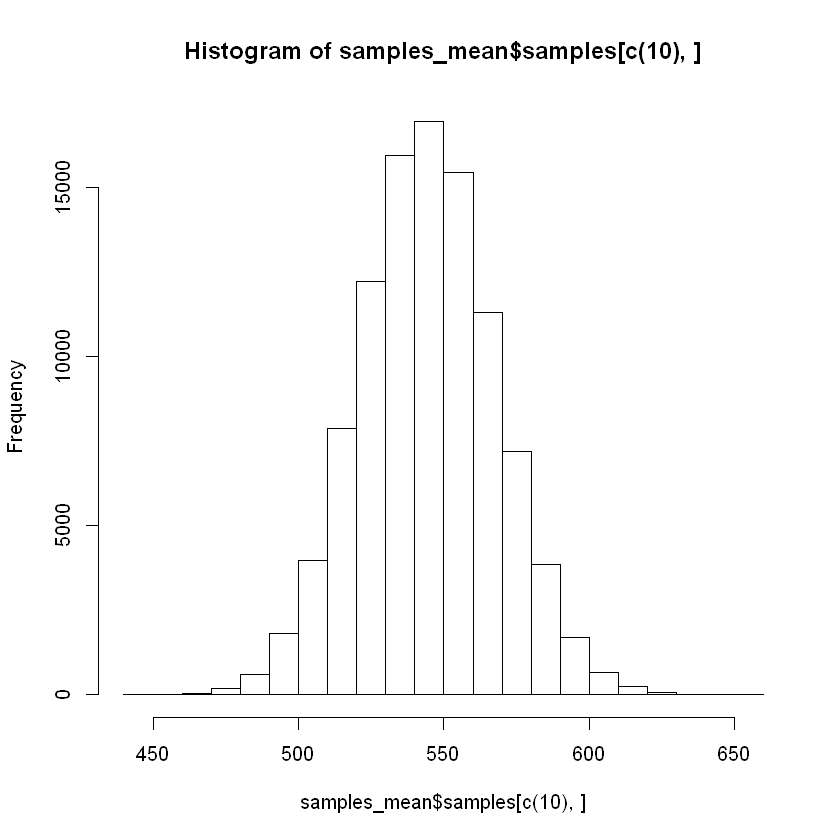

In [114]:
# Plot the result.
hist(samples_mean$samples[c(10), ])
#ggplot(data = df_no_sum, aes(x = samples_mean$samples[c(1), ])) + geom_histogram()

### Hypotesetest

$H_0:$ Der er ingen signifikant forskel på dødeligheden i de forskellige aldersgrupper.